<a href="https://colab.research.google.com/github/Piranavan25/ml-portfolio/blob/main/fashion-mnist-classifier/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#normalize the images
#which mean scale the pixel values from [0 - 255] to [0 - 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#reshape the images
# initially the images in 3 dimensition [number of samples, height, width] after this np.newaxis it will change the dimension to 4 [number of samples, height, width, channels] here channels = 1
# [[255, 128, 0],[64, 192, 32]] Shape: (2, 3)
#  to [[[255], [128], [0]],[[64], [192], [32]]] Shape: (2, 3, 1)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

Data Augmentation artificially expands the training dataset by creating modified versions of existing images. It applies random transformations like flipping, rotating, zooming, adjusting brightness/contrast, and adding noise. This helps prevent overfitting and improves model generalization by exposing it to varied scenarios during training. For our grayscale images, we'll use horizontal flips, small rotations, and zoom variations - all geometric transformations that preserve the original image content while creating useful variations.

In [ ]:
# Data argumentation -
# Original image → After augmentation might become:
# 1. Flipped horizontally (mirror image)
# 2. Slightly rotated
# 3. Slightly zoomed in
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

In [ ]:
# Building the CNN model

model = keras.Sequential([
    data_augmentation,  # Apply augmentation only during training
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model

history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6754 - loss: 0.9251 - val_accuracy: 0.7755 - val_loss: 0.6175
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.8005 - loss: 0.5313 - val_accuracy: 0.8175 - val_loss: 0.4764
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.8263 - loss: 0.4709 - val_accuracy: 0.8268 - val_loss: 0.4360
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.8401 - loss: 0.4331 - val_accuracy: 0.8380 - val_loss: 0.4340
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.8480 - loss: 0.4127 - val_accuracy: 0.8382 - val_loss: 0.4231
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.8544 - loss: 0.3945 - val_accuracy: 0.8458 - val_loss: 0.4041
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.8599 - loss: 0.3818 - val_accuracy: 0.8717 - val_loss: 0.3361
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.8689 - loss: 0.3586 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8834 - loss: 0.3283
Test Accuracy: 0.8828


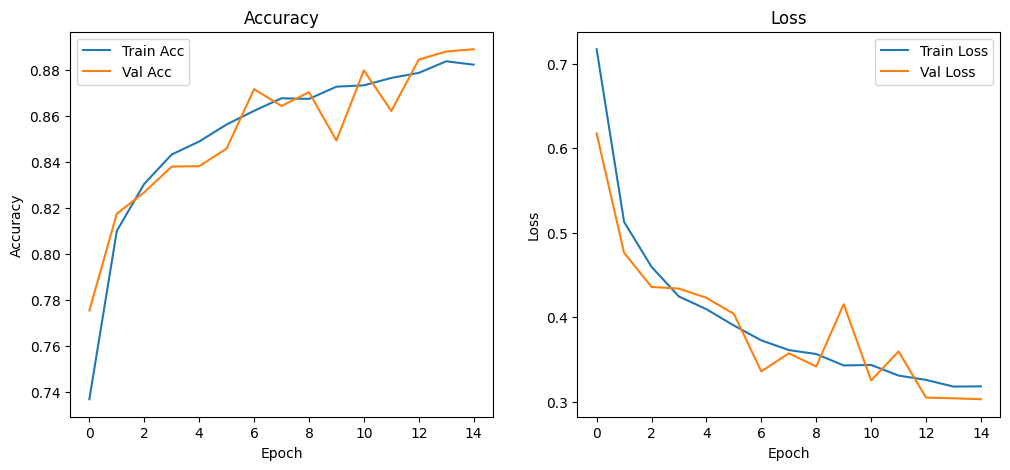

In [ ]:
#plot the training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step


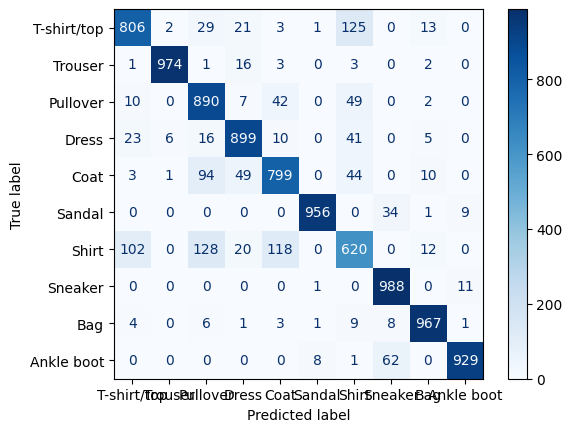

In [ ]:
# Confusion Matrix
pred_labels = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
disp.plot(cmap=plt.cm.Blues)
plt.show()

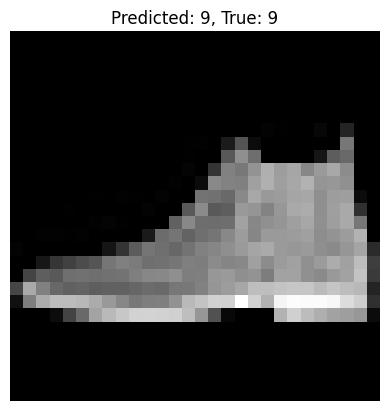

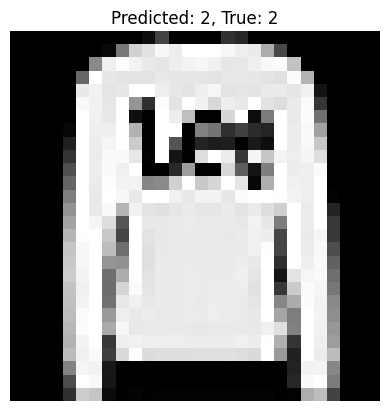

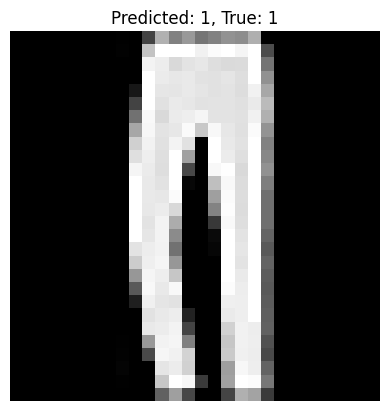

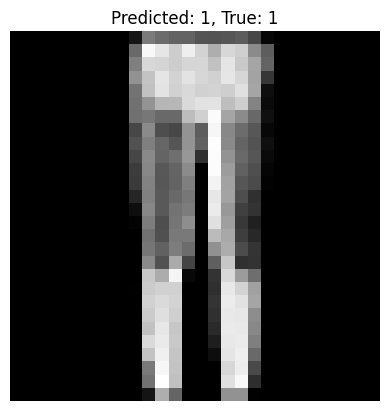

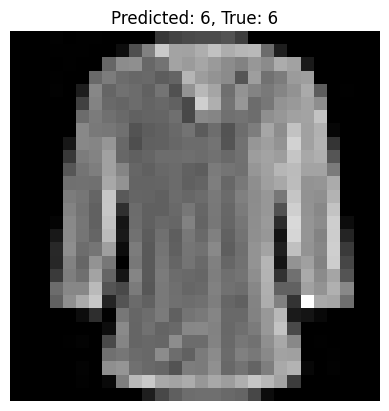

In [ ]:
# testing
for i in range(5):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f'Predicted: {pred_labels[i]}, True: {test_labels[i]}')
    plt.axis('off')
    plt.show()